# Metropolis Algorithm - Hopefield Network

Ismael CM
19/12/2022

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [85]:
def read_patern(path='Patern/patern.txt'):
	patern = np.loadtxt(path, delimiter=',', dtype=np.uint8)
	return patern

In [87]:
def patern2point(patern):
	"""Convert a patern (matrix) to a list of points (x,y) where matrix[i][j] == 1
	
	x = j and y = -i + len(patern)

	Explanation:
		j selects the row (vertical movement) and i selects the column (horizontal movement)
		In a plot, x corresponds to the horizontal axis and y to the vertical axis

		Reversing i (i.e. -i) is necessary because the matrix is read from top to bottom. This is the same as reversing the y axis in a plot, so now everything is in the 4th quadrant.
		Adding len(patern) traslates everything to the 1st quadrant.
	"""
	x = []
	y = []
	for i in range(len(patern)): 			# i is the row
		for j in range(len(patern[i])): 	# j is the column
			if patern[i][j] == 1:
				x.append(j) 		    	
				y.append(-i + len(patern)) 
	return x,y

In [88]:
def interaction(net):
	a = np.average(net)
	N = len(net)
	w = np.zeros((N, N, N, N)) 		# All zeros 
	for i in range(N):
		for j in range(N):
			for k in range(N):
				for l in range(N):
					if (i,j) != (k,l): 	# so no need to do the case where i,j == k,l
						w[i][j][k][l] = (1/N**2) * (net[i][j] - a)*(net[k][l] - a)
						
	return w

In [89]:
def activation(net):
	N = len(net)
	w = interaction(net)
	theta = np.zeros((N, N))
	for i in range(N):
		for j in range(N):
			for k in range(N):
				for l in range(N):
					theta[i][j] += 0.5*w[i][j][k][l]
	return theta 

In [90]:
def difH(i, j, net, omega, theta):
	H = 0
	H_alt = 0
	N = len(net)
	for k in range(N):
		for l in range(N):
			if (k != i) and (l != j):
				H += omega[i][j][k][l]*net[k][l]

	H = (2*net[i][j]-1)*(H - theta[i][j]) 
	return H


In [91]:
def Hamilt(net, omega, theta):
	H = 0 
	N = len(net)
	for i in range(N):
		for j in range(N):
			H += theta[i][j]*net[i][j]
			for k in range(N):
				for l in range(N):
					H += -0.5*omega[i][j][k][l]*net[i][j]*net[k][l]
	return H

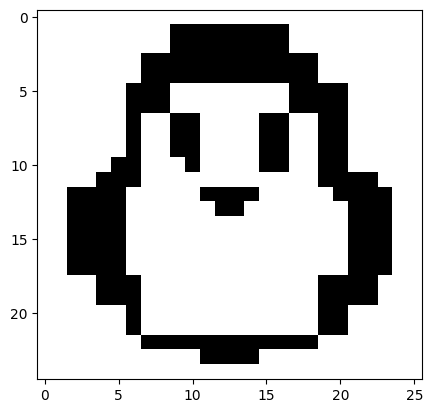

In [92]:
skull = read_patern("patern/skull.txt")
peng = read_patern("patern/peng.txt")
# x, y = patern2point(skull)
# plt.imshow(skull, cmap='binary')
# plt.scatter(x, y, s=50, c='k')
plt.imshow(peng, cmap='binary')
plt.show()

In [94]:
def active_phase(net, pMC, T):
	omega = interaction(net)
	theta = activation(net)
	N = len(net)

	s = np.random.randint(2, size=(N, N))

	pMC = pMC*N*N
	for k in range(pMC):
		if k%(N*N) == 0:
			# Plot
			plt.figure()
			plt.imshow(net, cmap='binary')
			plt.title(f"pMC = {int((k)/(N*N) + 1)}")
			plt.savefig(f"Plot/pMC{int((k)/(N*N) + 1)}.png")
			plt.close()
			print(f"Paso MoneteCarlo {int((k)/(N*N) + 1)}")

		aux_i = random.randint(0, N-1)
		aux_j = random.randint(0, N-1)
		
		H, H_alt = difH(aux_i, aux_j, net, omega, theta)
		p = np.exp(-H/T)
		if random.random() < p:
			net[aux_i][aux_j] = 1 - net[aux_i][aux_j]


In [ ]:
active_phase(skull, 20, 0.05)

In [ ]:
# # Active fase
# N = len(peng)
# # net = np.zeros((N, N), dtype=np.uint8)
# # net = peng.copy()
# net = np.random.randint(2, size=(N, N))
# pMC = 25*N*N
# T = 0.01
# for k in range(pMC):
# 	if k%(N*N) == 0:
# 		# Plot
# 		plt.figure()
# 		plt.imshow(net, cmap='binary')
# 		plt.title(f"pMC = {int((k)/(N*N) + 1)}")
# 		plt.savefig(f"Plot/pMC{int((k)/(N*N) + 1)}.png")
# 		plt.close()
# 		print(f"Paso MoneteCarlo {int((k)/(N*N) + 1)}")

# 	aux_i = random.randint(0, N-1)
# 	aux_j = random.randint(0, N-1)
	
# 	H, H_alt = difH(aux_i, aux_j, net, omega, theta)
# 	p = np.exp(-H/T)
# 	p_alt = np.exp(-H_alt/T)
# 	if random.random() < p:
# 		net[aux_i][aux_j] = 1 - net[aux_i][aux_j]

Paso MoneteCarlo 1
Paso MoneteCarlo 2
Paso MoneteCarlo 3
Paso MoneteCarlo 4
Paso MoneteCarlo 5
Paso MoneteCarlo 6
Paso MoneteCarlo 7
Paso MoneteCarlo 8
Paso MoneteCarlo 9
Paso MoneteCarlo 10
Paso MoneteCarlo 11
Paso MoneteCarlo 12
Paso MoneteCarlo 13
Paso MoneteCarlo 14
Paso MoneteCarlo 15
Paso MoneteCarlo 16
Paso MoneteCarlo 17
Paso MoneteCarlo 18
Paso MoneteCarlo 19
Paso MoneteCarlo 20
Paso MoneteCarlo 21
Paso MoneteCarlo 22
Paso MoneteCarlo 23
Paso MoneteCarlo 24
Paso MoneteCarlo 25
